In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import h5py
import corner

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
data = h5py.File("../DATA/RAW_22/DATA/SpectralData.hdf5")  

In [3]:
data.keys()

<KeysViewHDF5 ['Planet_0', 'Planet_1', 'Planet_10', 'Planet_100', 'Planet_1000', 'Planet_10000', 'Planet_10001', 'Planet_10002', 'Planet_10003', 'Planet_10004', 'Planet_10005', 'Planet_10006', 'Planet_10007', 'Planet_10008', 'Planet_10009', 'Planet_1001', 'Planet_10010', 'Planet_10011', 'Planet_10012', 'Planet_10013', 'Planet_10014', 'Planet_10015', 'Planet_10016', 'Planet_10017', 'Planet_10018', 'Planet_10019', 'Planet_1002', 'Planet_10020', 'Planet_10021', 'Planet_10022', 'Planet_10023', 'Planet_10024', 'Planet_10025', 'Planet_10026', 'Planet_10027', 'Planet_10028', 'Planet_10029', 'Planet_1003', 'Planet_10030', 'Planet_10031', 'Planet_10032', 'Planet_10033', 'Planet_10034', 'Planet_10035', 'Planet_10036', 'Planet_10037', 'Planet_10038', 'Planet_10039', 'Planet_1004', 'Planet_10040', 'Planet_10041', 'Planet_10042', 'Planet_10043', 'Planet_10044', 'Planet_10045', 'Planet_10046', 'Planet_10047', 'Planet_10048', 'Planet_10049', 'Planet_1005', 'Planet_10050', 'Planet_10051', 'Planet_1005

In [4]:
data["Planet_0"].keys()

<KeysViewHDF5 ['instrument_noise', 'instrument_spectrum', 'instrument_width', 'instrument_wlgrid']>

In [5]:
data["Planet_0"]['instrument_noise']

<HDF5 dataset "instrument_noise": shape (52,), type "<f8">

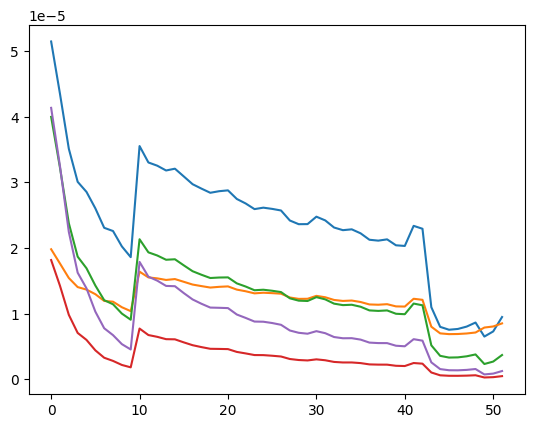

In [6]:
plt.plot(data["Planet_0"]['instrument_noise'][:])
plt.plot(data["Planet_1"]['instrument_noise'][:])
plt.plot(data["Planet_2"]['instrument_noise'][:])
plt.plot(data["Planet_3"]['instrument_noise'][:])
plt.plot(data["Planet_4"]['instrument_noise'][:])

In [7]:


file_path = "../DATA/RAW_22/DATA/SpectralData.hdf5"
sample_check=3


with h5py.File(file_path, 'r') as hdf:
    # Get sorted list of planet groups using natural sorting
    planet_groups = sorted(hdf.keys(), key=lambda x: int(x.split('_')[1]))
    num_planets = len(planet_groups)
    
    # Get reference wavelength and width data from first planet
    first_grp = hdf[planet_groups[0]]
    wlgrid = first_grp['instrument_wlgrid'][:]
    width = first_grp['instrument_width'][:]
    
    # Check data consistency using random samples (including last planet)
    check_indices = np.random.choice(num_planets, sample_check, replace=False)
    for i in check_indices:
        grp = hdf[planet_groups[i]]
        if not (np.allclose(grp['instrument_wlgrid'][:], wlgrid, atol=1e-9) and 
                np.allclose(grp['instrument_width'][:], width, atol=1e-9)):
            raise ValueError("Inconsistent wavelength grid or width between planets")
    
    # Create column names using vectorized operations
    # columns = [f"{wl:.6f}_{bw:.4f}" for wl, bw in zip(wlgrid, width)]
    columns = wlgrid

    # Preallocate memory for arrays
    noise_data = pd.DataFrame(data=None, index=planet_groups, columns=columns)

    spectrum_data = pd.DataFrame(data=None, index=planet_groups, columns=columns)
    spectrum_data.head()
    

    for grp_name in planet_groups:
        grp = hdf[grp_name]
        
        noise_data.loc[grp_name] = grp['instrument_noise'][:]
        spectrum_data.loc[grp_name] = grp['instrument_spectrum'][:]


# reverse the columns so wavelength is in ascending order
spectrum_data = spectrum_data[spectrum_data.columns[::-1]]
noise_data = noise_data[noise_data.columns[::-1]]






In [8]:
# create a dataframe with instrument data
ariel_grid = pd.DataFrame(data=None, columns=["wavelength_µm", "bin_width_µm"] )
ariel_grid["wavelength_µm"] = wlgrid[::-1]
ariel_grid["bin_width_µm"] = width[::-1]
ariel_grid = ariel_grid.rename_axis("bin_number")

ariel_grid.head()



,wavelength_µm,bin_width_µm
bin_number,,
0,0.550000,0.100833
1,0.700000,0.204167
2,0.950000,0.307670
3,1.156375,0.113019
4,1.274903,0.124603


In [9]:
ariel_grid['bin_width_µm']

bin_number
0     0.100833
1     0.204167
2     0.307670
3     0.113019
4     0.124603
5     0.137375
6     0.151456
7     0.166980
8     0.184095
9     0.039199
10    0.039987
11    0.040791
12    0.041610
13    0.042447
14    0.043300
15    0.044170
16    0.045058
17    0.045964
18    0.046888
19    0.047830
20    0.048791
21    0.049772
22    0.050773
23    0.051793
24    0.052834
25    0.053896
26    0.054979
27    0.056085
28    0.057212
29    0.058362
30    0.059535
31    0.060732
32    0.061952
33    0.063197
34    0.064468
35    0.065764
36    0.067085
37    0.068434
38    0.069809
39    0.071212
40    0.072644
41    0.074104
42    0.264618
43    0.282553
44    0.301704
45    0.322152
46    0.343987
47    0.367302
48    0.392197
49    0.418779
50    0.447163
51    0.477471
Name: bin_width_µm, dtype: float64

In [10]:
spectrum_data.head()

,0.550000,0.700000,0.950000,1.156375,1.274903,1.405581,1.549653,1.708493,1.883613,1.969598,...,4.032167,4.305458,4.597272,4.908865,5.241577,5.596840,5.976181,6.381233,6.813739,7.275559
Planet_0,0.00104,0.000994,0.001089,0.001204,0.001129,0.001251,0.001177,0.001334,0.001226,0.001155,...,0.001354,0.001313,0.001281,0.00131,0.001349,0.00139,0.001434,0.001462,0.001456,0.001671
Planet_1,0.000699,0.000677,0.000662,0.000678,0.00067,0.000676,0.000686,0.000699,0.000708,0.00072,...,0.000692,0.000703,0.000732,0.000719,0.000705,0.000721,0.000732,0.000742,0.000737,0.000761
Planet_2,0.001621,0.001602,0.001595,0.001608,0.001617,0.001608,0.001641,0.001616,0.001637,0.001667,...,0.00162,0.001656,0.001634,0.001619,0.001628,0.001658,0.001671,0.001677,0.001668,0.001651
Planet_3,0.009197,0.009192,0.009193,0.009199,0.009196,0.009202,0.009201,0.009208,0.009204,0.009204,...,0.009211,0.009224,0.009217,0.00921,0.009211,0.009213,0.009216,0.009218,0.009218,0.009228
Planet_4,0.000504,0.000491,0.000488,0.0005,0.000489,0.000527,0.000495,0.000501,0.000527,0.000525,...,0.000493,0.000543,0.000542,0.000538,0.000534,0.000544,0.000541,0.00054,0.000553,0.000549


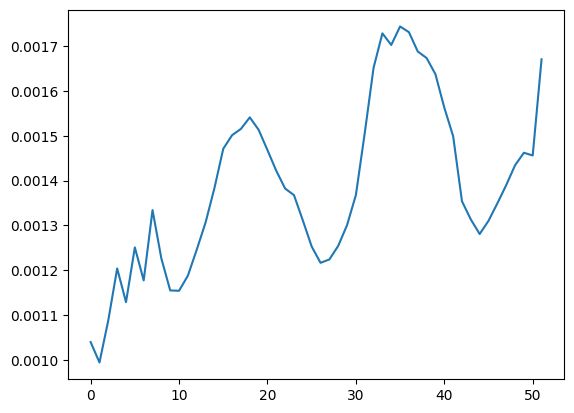

In [11]:
plt.plot(spectrum_data.loc['Planet_0'].values)

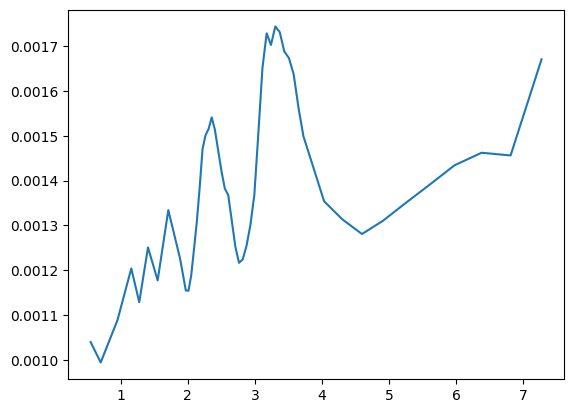

In [12]:
plt.plot(ariel_grid['wavelength_µm'],spectrum_data.loc['Planet_0'].values)


<ErrorbarContainer object of 3 artists>

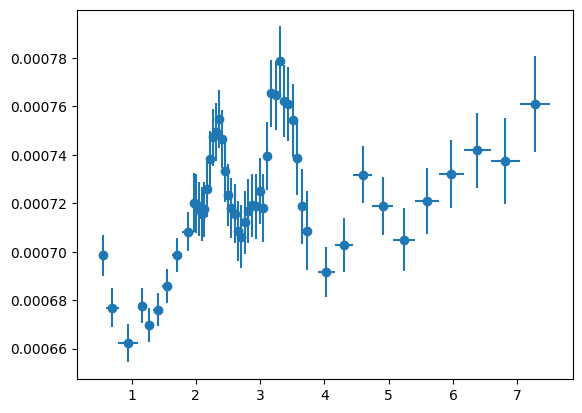

In [13]:
# plt.plot(noise_data.loc['Planet_1'])
plt.errorbar(x= ariel_grid['wavelength_µm'],
             y=spectrum_data.loc['Planet_1'], 
             xerr = ariel_grid['bin_width_µm']/2, 
             yerr=noise_data.loc['Planet_1'], 
             fmt='o', label='Planet 1')

In [14]:
aux_full_tb = pd.read_csv("../DATA/RAW_22/DATA/AuxillaryTable.csv",index_col = "planet_ID")
aux_full_tb = aux_full_tb.rename(columns={'star_temperature': 'star_temperature_k',})
aux_full_tb.head()

,star_distance,star_mass_kg,star_radius_m,star_temperature_k,planet_mass_kg,planet_orbital_period,planet_distance,planet_radius_m,planet_surface_gravity
planet_ID,,,,,,,,,
0,100.0510,1.531871e+30,612216000.0,5053.0,4.994682e+25,3.646200,0.042501,1.751739e+07,10.389141
1,28.2938,1.536643e+30,542646000.0,5071.0,3.040857e+25,16.201656,0.114991,1.309706e+07,11.315104
2,258.8930,1.888989e+30,688743000.0,5416.0,9.850620e+25,88.406553,0.381830,2.628654e+07,9.099284
3,1010.2800,2.087830e+30,751356000.0,5900.0,1.954940e+28,3.575320,0.046513,7.040038e+07,251.764117
4,1070.1700,2.028178e+30,953109000.0,5866.0,5.997680e+25,31.588900,0.196877,1.964499e+07,9.919505


In [15]:

labels_tb = pd.read_csv("/Users/jools/Documents/Uni/UCL/ARIEL/DATA/RAW_22/GROUND_TRUTH/FM_Parameter_Table.csv", index_col = "planet_ID")
labels_tb = labels_tb.rename(columns={'planet_temp': 'planet_temp_k'})
labels_tb.head()

,planet_temp_k,log_H2O,log_CO2,log_CH4,log_CO,log_NH3
planet_ID,,,,,,
0,1108.725067,-6.484809,-7.016512,-3.294729,-3.351913,-6.955828
1,636.858130,-8.829193,-8.603965,-5.501124,-4.799371,-6.020019
2,420.527609,-6.626830,-6.420932,-6.755727,-5.318471,-4.695118
3,1370.906116,-7.639372,-5.877303,-4.476840,-5.200010,-6.240726
4,746.170076,-4.172605,-6.899335,-6.360434,-4.140252,-8.896858


In [16]:
quartiles_tb = pd.read_csv("../DATA/RAW_22/GROUND_TRUTH/QuartilesTable.csv",index_col = "planet_ID")
quartiles_tb.head()


,T_q1,T_q2,T_q3,log_H2O_q1,log_H2O_q2,log_H2O_q3,log_CO2_q1,log_CO2_q2,log_CO2_q3,log_CH4_q1,log_CH4_q2,log_CH4_q3,log_CO_q1,log_CO_q2,log_CO_q3,log_NH3_q1,log_NH3_q2,log_NH3_q3
planet_ID,,,,,,,,,,,,,,,,,,
0,1096.754060,1109.490687,1122.716570,-10.884421,-8.867972,-6.684767,-10.153066,-7.434079,-6.823955,-3.346453,-3.291427,-3.229520,-4.082412,-3.399877,-3.042125,-11.019125,-8.890987,-6.977170
1,616.072976,636.977475,657.582228,-11.095211,-9.323549,-7.452824,-10.785395,-9.247521,-8.291703,-5.672253,-5.513984,-5.337995,-5.203368,-4.816855,-4.414735,-6.255204,-6.029390,-5.839559
2,411.059375,420.392211,429.156294,-10.450308,-7.773855,-6.522569,-6.884896,-6.449624,-6.060706,-8.724523,-7.086556,-6.492432,-5.972764,-5.390598,-4.929774,-4.773786,-4.668049,-4.556866
3,1357.964612,1382.813499,1409.892455,-10.882759,-8.827417,-6.804879,-6.073258,-5.891995,-5.733862,-4.529318,-4.478272,-4.430260,-10.659858,-7.749673,-5.096800,-10.860119,-7.922047,-6.382086
4,737.588375,746.177998,756.234493,-4.254871,-4.172825,-4.098340,-7.180686,-6.927282,-6.680215,-6.618038,-6.397635,-6.210865,-4.543197,-4.166813,-3.835200,-11.185112,-9.489310,-7.766874


In [17]:
qs = ['q1', 'q2', 'q3']
qs_dict = {}
for q in qs:
    qs_dict[q] = quartiles_tb.filter(regex=q)
    qs_dict[q] = qs_dict[q].rename(
        columns={f'T_{q}': 'planet_temp_k',
                f'log_H2O_{q}': 'log_H2O',
                f'log_CO2_{q}': 'log_CO2',
                f'log_CH4_{q}': 'log_CH4',
                f'log_CO_{q}': 'log_CO',
                f'log_NH3_{q}': 'log_NH3',})



In [18]:
qs_dict['q3'].head()

,planet_temp_k,log_H2O,log_CO2,log_CH4,log_CO,log_NH3
planet_ID,,,,,,
0,1122.716570,-6.684767,-6.823955,-3.229520,-3.042125,-6.977170
1,657.582228,-7.452824,-8.291703,-5.337995,-4.414735,-5.839559
2,429.156294,-6.522569,-6.060706,-6.492432,-4.929774,-4.556866
3,1409.892455,-6.804879,-5.733862,-4.430260,-5.096800,-6.382086
4,756.234493,-4.098340,-6.680215,-6.210865,-3.835200,-7.766874


In [19]:
print(f'ariel_grid shape is {ariel_grid.shape}\n with headers {ariel_grid.columns}\n')
print(f'spectrum_data shape is {spectrum_data.shape}\n with headers equal to the column wavelength_µm of ariel_grid\n')
print(f'noise_data shape is {noise_data.shape}\n with headers equal to the column wavelength_µm of ariel_grid\n')
print(f'labels_tb shape is {labels_tb.shape}\n with headers {labels_tb.columns}\n')
print(f'aux_full_tb shape is {aux_full_tb.shape}\n with headers {aux_full_tb.columns}\n')
print(f'there are then {len(qs)} quartiles_tables stored in a dictionary with keys {qs_dict.keys()} which all look like this:')
print(f'qs_dict["q3"] shape is {qs_dict["q3"].shape}\n with headers {qs_dict["q3"].columns}\n')


ariel_grid shape is (52, 2)
 with headers Index(['wavelength_µm', 'bin_width_µm'], dtype='object')

spectrum_data shape is (91392, 52)
 with headers equal to the column wavelength_µm of ariel_grid

noise_data shape is (91392, 52)
 with headers equal to the column wavelength_µm of ariel_grid

labels_tb shape is (91392, 6)
 with headers Index(['planet_temp_k', 'log_H2O', 'log_CO2', 'log_CH4', 'log_CO', 'log_NH3'], dtype='object')

aux_full_tb shape is (91392, 9)
 with headers Index(['star_distance', 'star_mass_kg', 'star_radius_m', 'star_temperature_k',
       'planet_mass_kg', 'planet_orbital_period', 'planet_distance',
       'planet_radius_m', 'planet_surface_gravity'],
      dtype='object')

there are then 3 quartiles_tables stored in a dictionary with keys dict_keys(['q1', 'q2', 'q3']) which all look like this:
qs_dict["q3"] shape is (91392, 6)
 with headers Index(['planet_temp_k', 'log_H2O', 'log_CO2', 'log_CH4', 'log_CO', 'log_NH3'], dtype='object')



In [20]:
import xarray as xr
import numpy as np

# Create coordinates from the data
wavelengths = ariel_grid['wavelength_µm'].values
bin_widths = ariel_grid['bin_width_µm'].values
parameters = labels_tb.columns.tolist()
quartile_labels = list(qs_dict.keys())

# Initialize the xarray Dataset with coordinates
ds = xr.Dataset(
    coords={
        'wavelength': wavelengths,
        'sample': np.arange(spectrum_data.shape[0]),
        'parameter': parameters,
        'quartile': quartile_labels
    }
)

# Add spectral grid information
ds['bin_width'] = xr.DataArray(
    bin_widths,
    dims=['wavelength'],
    attrs={'units': 'µm',
           'description': 'width of the spectral bins'}
)

# Add spectral data
ds['spectrum'] = xr.DataArray(
    spectrum_data.values,
    dims=['sample', 'wavelength'],
    attrs={'units': 'transit depth',
           'dataset': 'data',
           'description': 'the (forward model generated) observed spectra'}  # Update with actual metadata
)

ds['noise'] = xr.DataArray(
    noise_data.values,
    dims=['sample', 'wavelength'],
    attrs={'units': 'transit depth',
           'dataset': 'data',
           'description': 'estimated instrument noise in each bin'}
)

# Add planetary parameters (labels)
for param in parameters:
    ds[param] = xr.DataArray(
        labels_tb[param].values,
        dims=['sample'],
        attrs={'dataset': 'label'}
    )

# Add auxiliary parameters
for aux_param in aux_full_tb.columns:
    ds[aux_param] = xr.DataArray(
        aux_full_tb[aux_param].values,
        dims=['sample'],
        attrs={'dataset': 'auxiliary'}
    )

# Add quartiles using aligned parameters
quartile_data = np.stack([qs_dict[q].values for q in quartile_labels], axis=-1)

# Find indices of samples with valid quartiles
valid_quartiles_mask = ~np.isnan(quartile_data).all(axis=(1, 2))  # True for samples with valid quartiles
# Store the mask in the Dataset
ds['valid_quartiles'] = xr.DataArray(
    valid_quartiles_mask,
    dims=['sample'],
    attrs={'description': 'True for samples with asociated retrieval quartiles'}
)

ds['parameter_quartiles'] = xr.DataArray(
    quartile_data,
    dims=['sample', 'parameter', 'quartile'],
    attrs={'dataset':'label',
           'description': 'retrieval quartiles for each label parameter'}
)

In [21]:
# Define units for the parameters and auxiliary variables
label_units = {
    'planet_temp_k': 'kelvin',
    'log_H2O': 'log(mol/mol)',
    'log_CO2': 'log(mol/mol)',
    'log_CH4': 'log(mol/mol)',
    'log_CO': 'log(mol/mol)',
    'log_NH3': 'log(mol/mol)'
}

aux_units = {
    'star_distance': 'parsec',
    'star_mass_kg': 'kg',
    'star_radius': 'meters',
    'star_temperature_k': 'kelvin',
    'planet_mass_kg': 'kg',
    'planet_orbital_period': 'd@ys',
    'planet_distance': 'AU',
    'planet_radius_m': 'meters',
    'planet_surface_gravity': 'ms^-2',
}

# Add units to label parameters
for param in parameters:
    ds[param].attrs.update({
        'units': label_units.get(param, 'unknown'),  # Use 'unknown' if unit is not provided
    })

# Add units to auxiliary parameters
for aux_param in aux_full_tb.columns:
    ds[aux_param].attrs.update({
        'units': aux_units.get(aux_param, 'unknown'),  
    })

In [22]:
ds


<xarray.Dataset> Size: 101MB
Dimensions:                 (wavelength: 52, sample: 91392, parameter: 6,
                             quartile: 3)
Coordinates:
  * wavelength              (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                  (sample) int64 731kB 0 1 2 3 ... 91389 91390 91391
  * parameter               (parameter) <U13 312B 'planet_temp_k' ... 'log_NH3'
  * quartile                (quartile) <U2 24B 'q1' 'q2' 'q3'
Data variables: (12/20)
    bin_width               (wavelength) float64 416B 0.1008 0.2042 ... 0.4775
    spectrum                (sample, wavelength) object 38MB 0.00103996733103...
    noise                   (sample, wavelength) object 38MB 9.47818975788137...
    planet_temp_k           (sample) float64 731kB 1.109e+03 636.9 ... 1.035e+03
    log_H2O                 (sample) float64 731kB -6.485 -8.829 ... -8.708
    log_CO2                 (sample) float64 731kB -7.017 -8.604 ... -5.706
    ...                      ...
    planet_orbital_period   (sample) float64 731kB 3.646 16.2 ... 6.096 0.9352
    planet_distance         (sample) float64 731kB 0.0425 0.115 ... 0.01525
    planet_radius_m         (sample) float64 731kB 1.752e+07 ... 1.083e+07
    planet_surface_gravity  (sample) float64 731kB 10.39 11.32 ... 10.88 12.02
    valid_quartiles         (sample) bool 91kB True True True ... False False
    parameter_quartiles     (sample, parameter, quartile) float64 13MB 1.097e...

Text(0, 0.5, 'Transit depth')

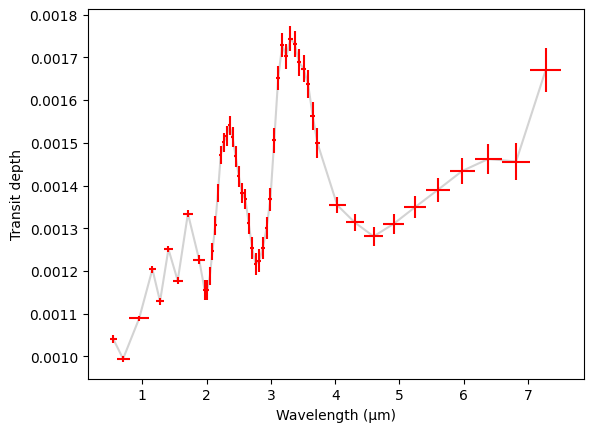

In [23]:
plt.plot(ds['wavelength'], ds['spectrum'].sel(sample = 0),color='lightgrey')
plt.errorbar(x = ds['wavelength'],
             y = ds['spectrum'].sel(sample = 0),
             xerr=ds['bin_width']/2,
             yerr=ds['noise'].sel(sample = 0),
             fmt=' ', label='Planet 0', color='red')

plt.xlabel('Wavelength (µm)')
plt.ylabel('Transit depth')

Text(0, 0.5, 'Number of samples')

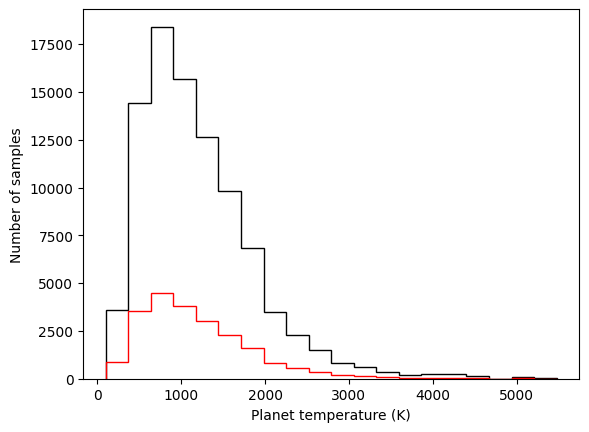

In [24]:
plt.hist(ds['planet_temp_k'], 
         bins=20, 
         histtype='step', color='k', label='All samples')

plt.hist(ds['planet_temp_k'].where(ds['valid_quartiles']), 
         bins=20, 
         histtype='step', color='r', label='Valid quartiles')

plt.xlabel('Planet temperature (K)')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Planet temperature (K)')

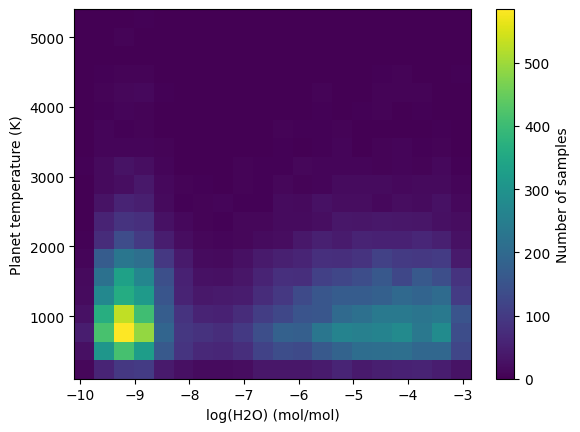

In [25]:
plt.hist2d(ds['parameter_quartiles'].sel(sample=ds['valid_quartiles'],
                                          parameter='log_H2O',
                                          quartile='q2'),
            ds['parameter_quartiles'].sel(sample=ds['valid_quartiles'],
                                          parameter='planet_temp_k',
                                          quartile='q2'),
            bins=20, cmap='viridis')

plt.colorbar(label='Number of samples')
plt.xlabel('log(H2O) (mol/mol)')
plt.ylabel('Planet temperature (K)')

In [26]:
ds['parameter_quartiles'].sel(sample=ds['valid_quartiles'],
                                        parameter=parameters,
                                        quartile='q2').values.shape

(21988, 6)

In [27]:
ds[parameters].sel(sample=ds['valid_quartiles'],
          ).to_array().values.T.shape

(21988, 6)

In [28]:
ds[parameters].sel(sample=ds['valid_quartiles'],
          ).to_array().values.T.shape

(21988, 6)

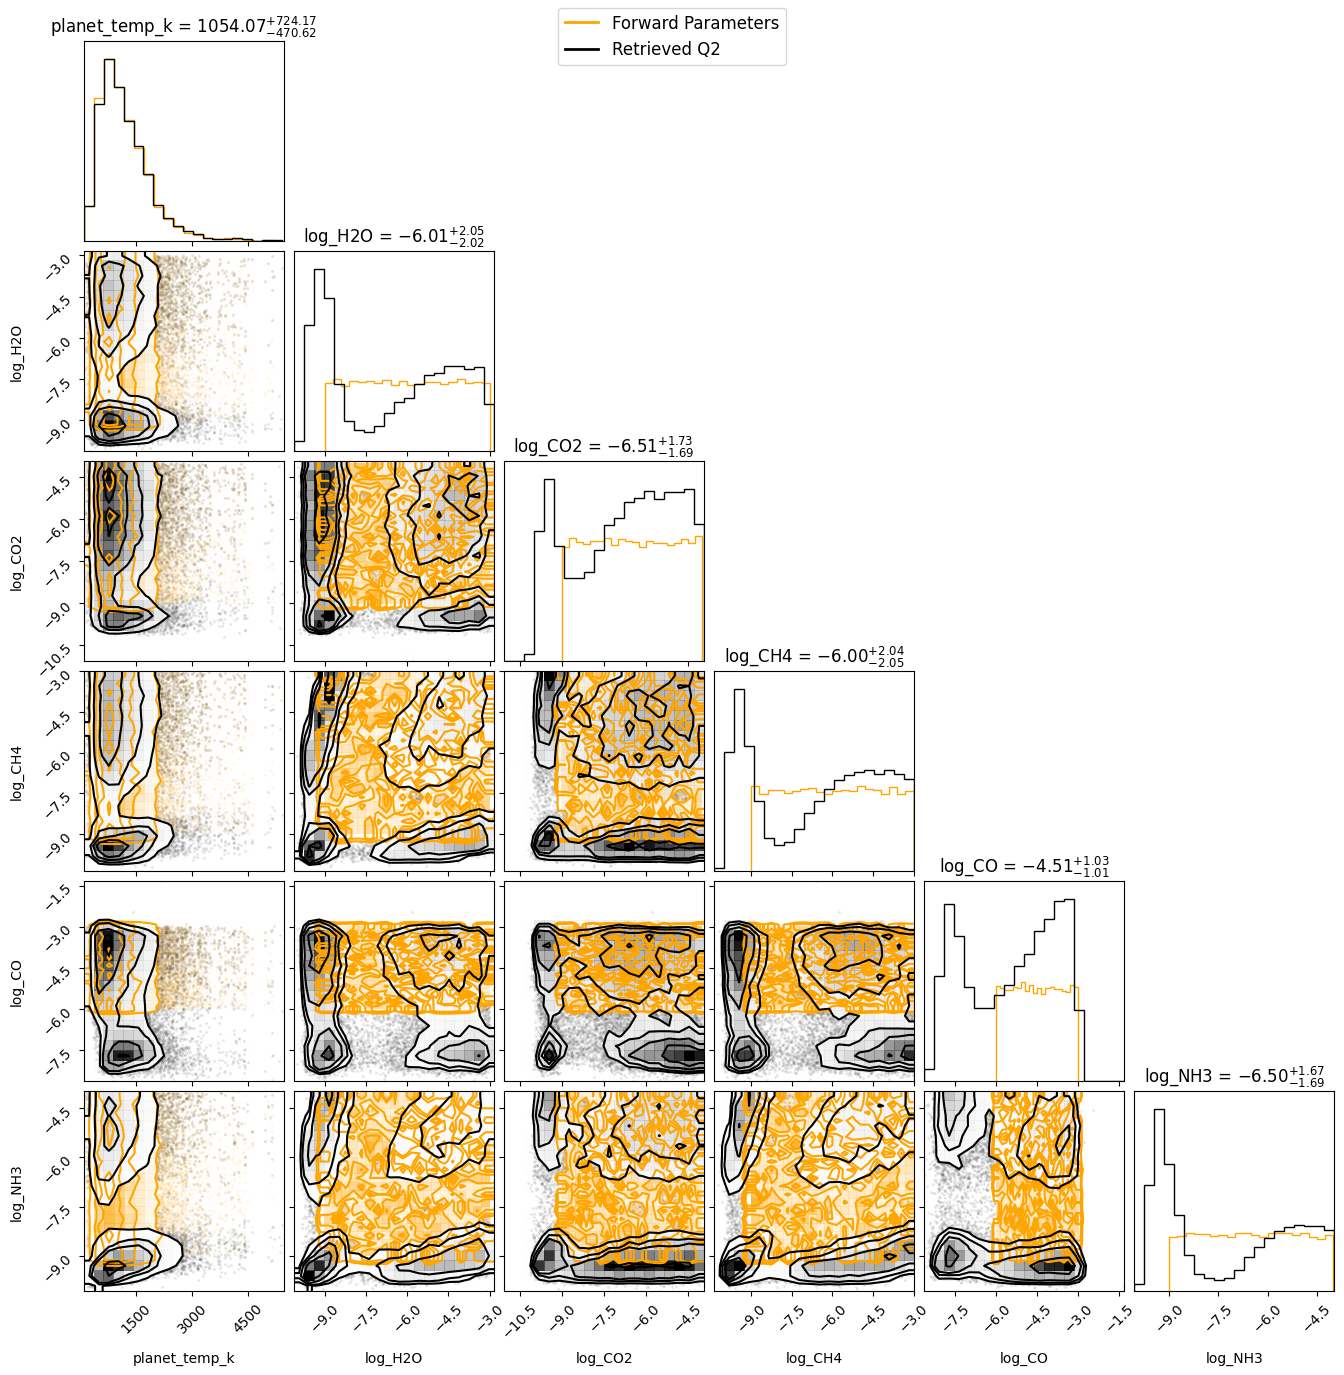

In [29]:
import corner
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Second plot: parameters overlayed on the first plot
fig = corner.corner(
    ds[parameters].sel(sample=ds['valid_quartiles']).to_array().values.T,
    labels=parameters,
    show_titles=True,
    title_fmt='.2f',
    color='orange',  

)

# First plot: parameter_quartiles for quartile 'q2'
corner.corner(
    ds['parameter_quartiles'].sel(
        sample=ds['valid_quartiles'],
        parameter=parameters,
        quartile='q2'
    ).values,
    labels=parameters,

    show_titles=False,  # Disable titles for the overlay
    color='k',  
    fig=fig,  # Use the same figure as the first plot
)



# Add a legend
legend_elements = [
    Line2D([0], [0], color='orange', lw=2, label='Forward Parameters'),
    Line2D([0], [0], color='k', lw=2, label='Retrieved Q2'),
    
]
fig.legend(handles=legend_elements, loc='upper center', fontsize='large')

# Show the combined plot
plt.show()


In [30]:
ds.close()

In [31]:
ds.to_netcdf("../DATA/proccessed_22.hdf5")
ds.close()

In [32]:

check = xr.open_dataset("../DATA/proccessed_22.hdf5")
check.close()

In [33]:
check

<xarray.Dataset> Size: 101MB
Dimensions:                 (wavelength: 52, sample: 91392, parameter: 6,
                             quartile: 3)
Coordinates:
  * wavelength              (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                  (sample) int64 731kB 0 1 2 3 ... 91389 91390 91391
  * parameter               (parameter) <U13 312B 'planet_temp_k' ... 'log_NH3'
  * quartile                (quartile) <U2 24B 'q1' 'q2' 'q3'
Data variables: (12/20)
    bin_width               (wavelength) float64 416B ...
    spectrum                (sample, wavelength) float64 38MB ...
    noise                   (sample, wavelength) float64 38MB ...
    planet_temp_k           (sample) float64 731kB ...
    log_H2O                 (sample) float64 731kB ...
    log_CO2                 (sample) float64 731kB ...
    ...                      ...
    planet_orbital_period   (sample) float64 731kB ...
    planet_distance         (sample) float64 731kB ...
    planet_radius_m         (sample) float64 731kB ...
    planet_surface_gravity  (sample) float64 731kB ...
    valid_quartiles         (sample) bool 91kB ...
    parameter_quartiles     (sample, parameter, quartile) float64 13MB ...

In [34]:
check['planet_orbital_period'] = check['planet_orbital_period'].astype('float64')

In [35]:
check

<xarray.Dataset> Size: 101MB
Dimensions:                 (wavelength: 52, sample: 91392, parameter: 6,
                             quartile: 3)
Coordinates:
  * wavelength              (wavelength) float64 416B 0.55 0.7 ... 6.814 7.276
  * sample                  (sample) int64 731kB 0 1 2 3 ... 91389 91390 91391
  * parameter               (parameter) <U13 312B 'planet_temp_k' ... 'log_NH3'
  * quartile                (quartile) <U2 24B 'q1' 'q2' 'q3'
Data variables: (12/20)
    bin_width               (wavelength) float64 416B ...
    spectrum                (sample, wavelength) float64 38MB ...
    noise                   (sample, wavelength) float64 38MB ...
    planet_temp_k           (sample) float64 731kB ...
    log_H2O                 (sample) float64 731kB ...
    log_CO2                 (sample) float64 731kB ...
    ...                      ...
    planet_orbital_period   (sample) float64 731kB 3.646 16.2 ... 6.096 0.9352
    planet_distance         (sample) float64 731kB ...
    planet_radius_m         (sample) float64 731kB ...
    planet_surface_gravity  (sample) float64 731kB ...
    valid_quartiles         (sample) bool 91kB ...
    parameter_quartiles     (sample, parameter, quartile) float64 13MB ...

In [36]:
check.identical(ds)

True

In [37]:
ds.coords.identical(check.coords)

True

In [38]:
xr.testing.assert_allclose(ds, check)

In [39]:
print(ds['planet_orbital_period'].dtype, check['planet_orbital_period'].dtype)
print(ds['planet_orbital_period'].values[:10])  # First 10 values in ds
print(check['planet_orbital_period'].values[:10])  # First 10 values in check


float64 float64
[ 3.6462     16.201656   88.40655258  3.57532    31.58889961  3.647523
  3.9592516   4.3619499   2.1460405   6.65642   ]
[ 3.6462     16.201656   88.40655258  3.57532    31.58889961  3.647523
  3.9592516   4.3619499   2.1460405   6.65642   ]


In [40]:
print(ds['planet_orbital_period'].attrs)
print(check['planet_orbital_period'].attrs)


{'dataset': 'auxiliary', 'units': 'd@ys'}
{'dataset': 'auxiliary', 'units': 'd@ys'}
